## libraries

In [1]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.datasets import cifar10
# from sklearn import preprocessing
import matplotlib.pyplot as plt
# from keras.regularizers import l2
import pandas as pd
import numpy as np


# import random
# import time

2025-04-13 08:25:01.873103: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 08:25:02.188838: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## load data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## normalization

In [3]:
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

## validation set

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42,stratify=y_train)

In [5]:
x_train.shape, x_val.shape, x_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

## data augmentation

In [6]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,         # rotate images up to 15 degrees
    width_shift_range=0.1,     # shift images horizontally by 10%
    height_shift_range=0.1,    # shift images vertically by 10%
    horizontal_flip=True,      # flip images horizontally
    zoom_range=0.1,   # zoom images up to 10%
    vertical_flip=False # don't flip images vertically
)

datagen.fit(x_train)

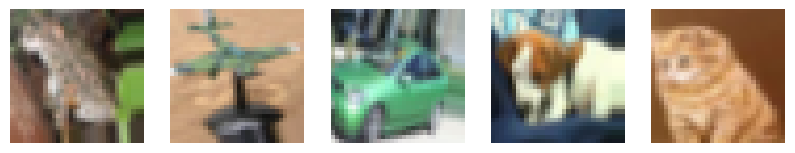

In [7]:
augmented_images = next(datagen.flow(x_train, batch_size=5)) 

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.show()

## create CNN

In [22]:
def define_cnn_model():
    model = Sequential()

    model.add(Conv2D(16, kernel_size=3, padding='valid', activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(16, kernel_size=3, padding='valid', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)),)

    model.add(Conv2D(32, kernel_size=3, padding='valid', activation='relu'),)
    model.add(Conv2D(32, kernel_size=3, padding='valid', activation='relu'),)
    model.add(MaxPooling2D(pool_size=(2, 2)),)

    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    return model

In [23]:
model = define_cnn_model()

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## fit on training data

In [24]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=5,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 82ms/step - accuracy: 0.2774 - loss: 1.9523 - val_accuracy: 0.4290 - val_loss: 1.5678
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 85ms/step - accuracy: 0.4288 - loss: 1.5612 - val_accuracy: 0.5098 - val_loss: 1.3785
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.4774 - loss: 1.4434 - val_accuracy: 0.5221 - val_loss: 1.3667
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.5127 - loss: 1.3679 - val_accuracy: 0.5621 - val_loss: 1.2541
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.5313 - loss: 1.2991 - val_accuracy: 0.5798 - val_loss: 1.2107


In [26]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

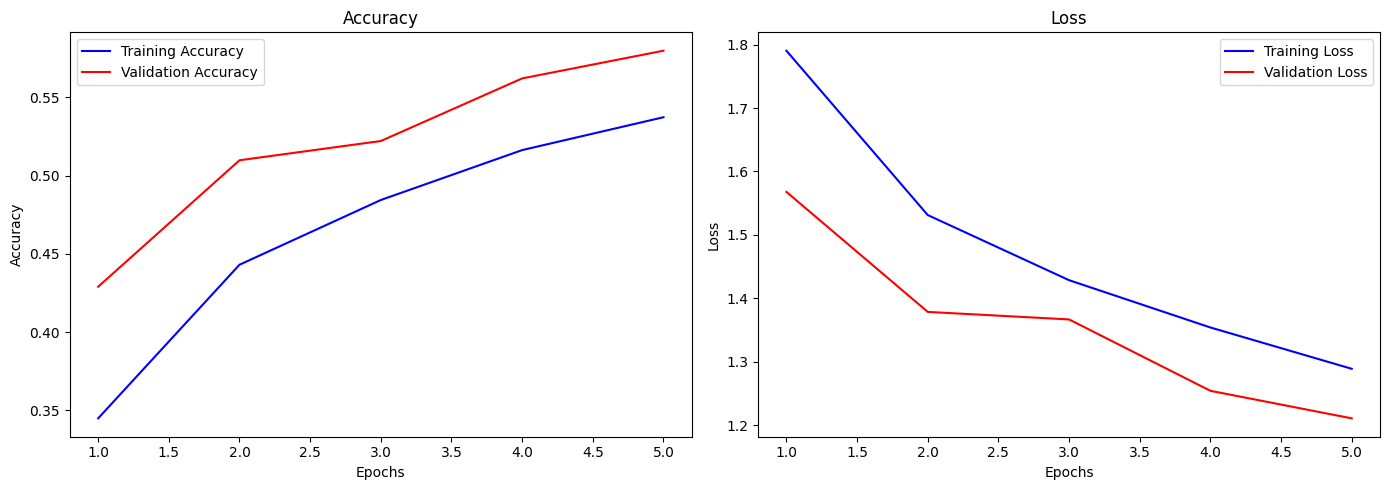

In [27]:
plot_history(history)

## improving CNN

In [28]:
# increase the number of filters and add more conv2D layers
# use same padding which preserves the image size
# add hidden dense layer to provide extra capacity to learn useful features combinations before classification
# control the learning rate of Adam (0.001)

model_enh = Sequential()

model_enh.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_enh.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model_enh.add(MaxPooling2D(pool_size=(2, 2)))
model_enh.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_enh.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_enh.add(MaxPooling2D(pool_size=(2, 2)))
model_enh.add(Flatten())
model_enh.add(Dense(512, activation='relu'))
model_enh.add(Dense(10, activation='softmax'))

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model_enh.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
history_enh = model_enh.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=5,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/5


/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 206ms/step - accuracy: 0.3412 - loss: 1.7887 - val_accuracy: 0.5846 - val_loss: 1.1588
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 197ms/step - accuracy: 0.5612 - loss: 1.2221 - val_accuracy: 0.6492 - val_loss: 1.0128
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.6227 - loss: 1.0547 - val_accuracy: 0.6853 - val_loss: 0.9068
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 197ms/step - accuracy: 0.6621 - loss: 0.9477 - val_accuracy: 0.6987 - val_loss: 0.8805
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 194ms/step - accuracy: 0.6869 - loss: 0.8814 - val_accuracy: 0.7233 - val_loss: 0.8137


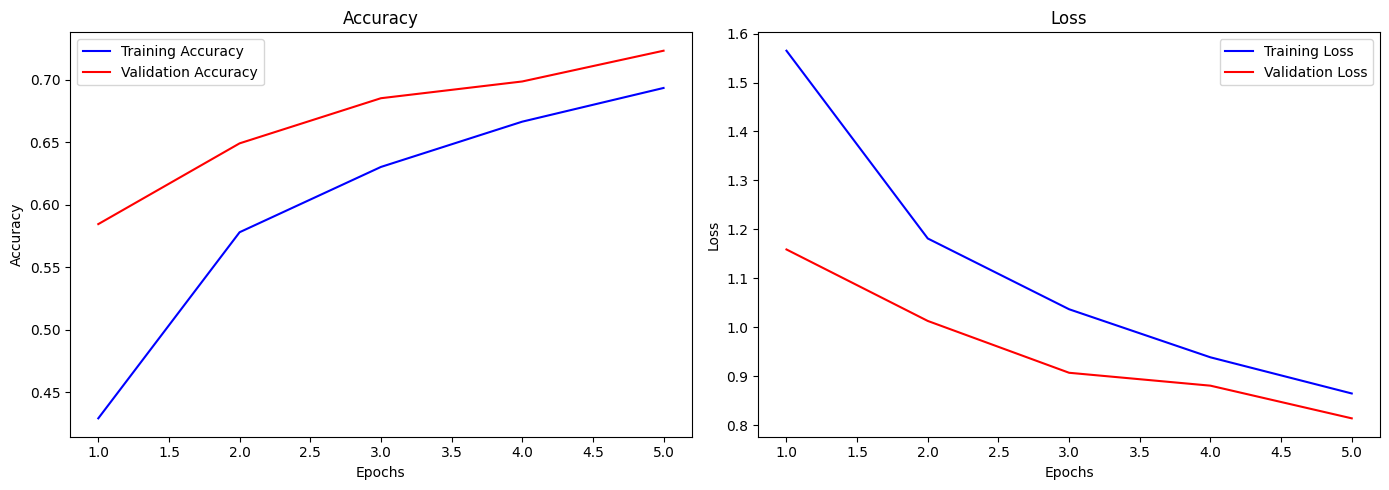

In [31]:
plot_history(history_enh)